<h1 style='font-size: 35px; color: blue; font-family: French Script MT; text-align: center; font-weight: 600'>Kruskal-Wallis Test | Comparing Group Mediun Differences</h1>

---

<h2 style='font-family: French Script MT; font-weight: 600; font-size: 30px; text-align: left'>1.0. Import Required Libraries</h2>

In [46]:
from scipy.stats import  skew, kurtosis 
from scipy.stats import gaussian_kde
from scipy.stats import kruskal
import scipy.stats as stats  

import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  
import numpy as np 
import math  

import warnings  
warnings.simplefilter("ignore")  
pd.set_option('display.max_columns', 10) 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<h2 style='font-family: French Script MT; font-weight: 600; font-size: 30px; text-align: left'>2.0. Load and Inspect Dataset</h2>

In [4]:
DATA_PATH = "./Datasets/Eggplant Fusarium Fresistance Data.csv"
df = pd.read_csv(DATA_PATH)
display(df)

,Variety,Resistance Level,Replication ID,Infection Severity (%),Wilt index,Plant height (cm),Days to wilt symptoms,Survival rate (%),Disease incidence (%)
0,EP-R1,Resistant,1,22.50,0.70,88.90,21,88.80,23.40
1,EP-R1,Resistant,2,27.90,1.20,82.20,19,87.70,21.70
2,EP-R1,Resistant,3,21.20,0.00,74.70,17,84.90,27.20
3,EP-R1,Resistant,4,15.50,0.10,93.80,18,90.30,15.00
4,EP-R1,Resistant,5,17.30,0.90,78.10,19,87.00,23.00
...,...,...,...,...,...,...,...,...,...
795,EP-S3,Susceptible,96,75.20,3.60,68.20,7,6.40,85.50
796,EP-S3,Susceptible,97,74.80,4.90,59.50,4,27.20,82.00
797,EP-S3,Susceptible,98,58.10,3.60,78.80,7,30.80,75.40
798,EP-S3,Susceptible,99,54.10,4.10,63.70,7,24.10,81.80


<h2 style='font-family: French Script MT; font-size: 30px; font-weight: 600'>3.0: Dataset Informartion Overviews</h2>

In [5]:
df.shape

(800, 9)

In [6]:
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

--------------- Variety
--------------- Resistance Level
--------------- Replication ID
--------------- Infection Severity (%)
--------------- Wilt index
--------------- Plant height (cm)
--------------- Days to wilt symptoms
--------------- Survival rate (%)
--------------- Disease incidence (%)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Variety                 800 non-null    object 
 1   Resistance Level        800 non-null    object 
 2   Replication ID          800 non-null    int64  
 3   Infection Severity (%)  800 non-null    float64
 4   Wilt index              800 non-null    float64
 5   Plant height (cm)       800 non-null    float64
 6   Days to wilt symptoms   800 non-null    int64  
 7   Survival rate (%)       800 non-null    float64
 8   Disease incidence (%)   800 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 56.4+ KB


<h4 style=' font-family: French Script MT; font-size: 25px; font-weight: 600'>3.2: Columns Profiling</h4>

In [8]:
def column_summary(df):
    summary_data = []
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Variety,object,0,800,8,"{'EP-R1': 100, 'EP-R2': 100, 'EP-R3': 100, 'EP..."
1,Resistance Level,object,0,800,3,"{'Resistant': 300, 'Susceptible': 300, 'Modera..."
2,Replication ID,int64,0,800,100,"{1: 8, 2: 8, 3: 8, 4: 8, 5: 8, 6: 8, 7: 8, 8: ..."
3,Infection Severity (%),float64,0,800,473,"{21.4: 6, 22.6: 6, 21.2: 6, 19.1: 6, 21.3: 5, ..."
4,Wilt index,float64,0,800,51,"{5.0: 31, 4.3: 26, 4.0: 25, 0.5: 24, 0.9: 24, ..."
5,Plant height (cm),float64,0,800,345,"{72.0: 9, 85.6: 6, 72.8: 6, 85.1: 6, 79.1: 6, ..."
6,Days to wilt symptoms,int64,0,800,20,"{7: 115, 8: 66, 6: 64, 19: 60, 12: 58, 18: 53,..."
7,Survival rate (%),float64,0,800,488,"{100.0: 7, 90.4: 6, 85.0: 6, 86.9: 5, 29.0: 5,..."
8,Disease incidence (%),float64,0,800,492,"{82.7: 6, 78.9: 5, 84.0: 5, 24.0: 4, 83.5: 4, ..."


<h4 style='font-family: French Script MT;  font-size: 25px; font-weight: 600'>3.3: Exploring Invalid Entries Dtypes</h4>

In [9]:
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'  # Add % sign and format to 2 decimal places
            else:
                results.at[column, dtype] = '-'  # Add dash for 0%
    return results

results = analyze_column_dtypes(df)
display(results)


,Numeric,Datetime,Other,Missing,String
Variety,-,-,-,-,100.00%
Resistance Level,-,-,-,-,100.00%
Replication ID,100.00%,-,-,-,-
Infection Severity (%),100.00%,-,-,-,-
Wilt index,100.00%,-,-,-,-
Plant height (cm),100.00%,-,-,-,-
Days to wilt symptoms,100.00%,-,-,-,-
Survival rate (%),100.00%,-,-,-,-
Disease incidence (%),100.00%,-,-,-,-


<h4 style=' font-family: French Script MT;  font-size: 25px;  font-weight: 600'>3.4: Handling Duplicates Values</h4>

In [10]:
def handling_duplicates(df):
    Duplicates = df.duplicated().sum()
    if Duplicates != 0:
        df.drop_duplicates(inplace=True)
        return 
        print(f'Dataset has {Duplicates} Duplicates and values was cleaned successifully')
    else:
        print('Dataset has no Duplictes values')
handling_duplicates(df)

Dataset has no Duplictes values


<h4 style='font-size: 25px; font-family: French Script MT; font-weight: 600'>3.5: Checking Missing Values</h4>

In [11]:
def Missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = Missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,Variety,0,0.00
1,Resistance Level,0,0.00
2,Replication ID,0,0.00
3,Infection Severity (%),0,0.00
4,Wilt index,0,0.00
5,Plant height (cm),0,0.00
6,Days to wilt symptoms,0,0.00
7,Survival rate (%),0,0.00
8,Disease incidence (%),0,0.00


<h3 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>3.6: Detection and Handling Outliers (Using the Interquartile Range (IQR) Method)</h3>

In [12]:
def detect_outliers_overall(df):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    outlier_counts = {}
    total_obs = df.shape[0]
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
        outlier_counts[col] = {
            'Outlier Count': count,
            'Total Observations': total_obs,
            'Proportion (%)': round((count / total_obs) * 100, 2)
        }
    
    result = pd.DataFrame.from_dict(outlier_counts, orient='index')
    summary_row = {
        'Outlier Count': result['Outlier Count'].sum(),
        'Total Observations': total_obs,
        'Proportion (%)': round((result['Outlier Count'].sum() / (total_obs * len(numeric_cols))) * 100, 2)
    }
    result.loc['Total'] = summary_row
    return result

overall_outliers = detect_outliers_overall(df)
display(overall_outliers)

,Outlier Count,Total Observations,Proportion (%)
Replication ID,0,800,0.00
Infection Severity (%),0,800,0.00
Wilt index,0,800,0.00
Plant height (cm),0,800,0.00
Days to wilt symptoms,0,800,0.00
Survival rate (%),0,800,0.00
Disease incidence (%),0,800,0.00
Total,0,800,0.00


In [15]:
def Outlier_detection_IQR(df: pd.DataFrame, group_col: str) -> pd.DataFrame:
    Variables = df.select_dtypes(include=['number']).columns.tolist()
    if group_col in Variables:
        Variables.remove(group_col)
    
    results = []
    for group, group_df in df.groupby(group_col):
        group_size = len(group_df)
        outlier_counts = {}
        for col in Variables:
            Q1 = group_df[col].quantile(0.25)
            Q3 = group_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outlier_count = ((group_df[col] < lower_bound) | (group_df[col] > upper_bound)).sum()
            outlier_counts[col] = outlier_count
        
        results.append({"Group": group, **outlier_counts, "Total Observations": group_size})
    outlier_df = pd.DataFrame(results)
    return outlier_df

Outliers = Outlier_detection_IQR(df, group_col='Variety')
Outliers.T

,0,1,2,3,4,5,6,7
Group,EP-M1,EP-M2,EP-R1,EP-R2,EP-R3,EP-S1,EP-S2,EP-S3
Replication ID,0,0,0,0,0,0,0,0
Infection Severity (%),0,3,0,2,0,0,0,1
Wilt index,3,2,0,0,1,0,2,2
Plant height (cm),1,1,0,2,5,1,1,0
Days to wilt symptoms,0,1,1,2,1,0,0,0
Survival rate (%),0,2,1,1,0,0,2,0
Disease incidence (%),0,0,2,1,0,0,4,0
Total Observations,100,100,100,100,100,100,100,100


<h1 style='font-family: French Script MT; font-size: 30px;  font-weight: 600''>4.0: Statistic Description of The Datasets</h1>

Let's take a moment to quickly explore some essential statistics of our dataset. By using the `describe()` function in pandas, we can generate a summary of key metrics for each numerical column in the dataset. This gives us a bird's-eye view of the data, helping us understand the general distribution and characteristics of the values.

In [17]:
summary_stats = df.describe().T.reset_index(names='Variable')
summary_stats

,Variable,count,mean,std,min,25%,50%,75%,max
0,Replication ID,800.00,50.50,28.88,1.00,25.75,50.50,75.25,100.00
1,Infection Severity (%),800.00,46.89,24.68,9.40,22.08,44.85,69.55,98.90
2,Wilt index,800.00,2.49,1.57,0.00,1.00,2.50,4.00,5.00
3,Plant height (cm),800.00,75.00,10.13,50.50,67.00,74.45,83.60,99.70
4,Days to wilt symptoms,800.00,12.35,5.16,4.00,7.00,12.00,17.00,23.00
5,Survival rate (%),800.00,56.62,29.35,0.90,28.40,54.90,87.40,100.00
6,Disease incidence (%),800.00,52.64,24.93,5.10,28.88,51.45,77.80,95.50


In [18]:
summary_stats = df.describe(include='all').T.reset_index(names='Variable')
summary_stats

,Variable,count,unique,top,freq,...,min,25%,50%,75%,max
0,Variety,800,8,EP-R1,100,...,NaN,NaN,NaN,NaN,NaN
1,Resistance Level,800,3,Resistant,300,...,NaN,NaN,NaN,NaN,NaN
2,Replication ID,800.00,NaN,NaN,NaN,...,1.00,25.75,50.50,75.25,100.00
3,Infection Severity (%),800.00,NaN,NaN,NaN,...,9.40,22.08,44.85,69.55,98.90
4,Wilt index,800.00,NaN,NaN,NaN,...,0.00,1.00,2.50,4.00,5.00
5,Plant height (cm),800.00,NaN,NaN,NaN,...,50.50,67.00,74.45,83.60,99.70
6,Days to wilt symptoms,800.00,NaN,NaN,NaN,...,4.00,7.00,12.00,17.00,23.00
7,Survival rate (%),800.00,NaN,NaN,NaN,...,0.90,28.40,54.90,87.40,100.00
8,Disease incidence (%),800.00,NaN,NaN,NaN,...,5.10,28.88,51.45,77.80,95.50


<h4 style='font-family: French Script MT; font-size: 25px;  font-weight: 600'>4.1: Continuous Variables Summary Statics</h4>

In [19]:
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis


        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

pd.set_option('display.max_columns', 10) 
Continuous_variables_distribution = compute_overall_distribution_stats(df)
Continuous_variables_distribution

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,Replication ID,50.50,50.50,1.00,28.88,834.29,99.00,0.00,-1.20
1,Infection Severity (%),46.89,44.85,19.10,24.68,608.97,89.50,0.21,-1.41
2,Wilt index,2.49,2.50,5.00,1.57,2.46,5.00,0.00,-1.40
3,Plant height (cm),75.00,74.45,72.00,10.13,102.71,49.20,0.09,-0.82
4,Days to wilt symptoms,12.35,12.00,7.00,5.16,26.66,19.00,0.20,-1.34
5,Survival rate (%),56.62,54.90,100.00,29.35,861.32,99.10,-0.02,-1.54
6,Disease incidence (%),52.64,51.45,82.70,24.93,621.73,90.40,0.03,-1.45


<h4 style='font-family: French Script MT; font-size: 25px;  font-weight: 600'>4.2: Grouped Summary Statics I</h4>

In [22]:
def summary_statistics(df, group_col=None):
    results = []
    if group_col: grouped = df.groupby(group_col)
    else: grouped = [(None, df)]

    for group_name, group_df in grouped:
        for col in group_df.select_dtypes(include=[np.number]).columns:
            mean = group_df[col].mean()
            median = group_df[col].median()
            mode = group_df[col].mode().iloc[0] if not group_df[col].mode().empty else np.nan
            std_dev = group_df[col].std()
            variance = group_df[col].var()
            value_range = group_df[col].max() - group_df[col].min()
            skewness_val = skew(group_df[col], nan_policy='omit')  # Skewness
            kurtosis_val = kurtosis(group_df[col], nan_policy='omit')  # Kurtosis
    
            results.append({
                'Group': group_name if group_col else 'Overall',
                'Parameter': col,
                'Mean': mean,
                'Median': median,
                'Mode': mode,
                'Std. Deviation': std_dev,
                'Variance': variance,
                'Range': value_range,
                'Skewness': skewness_val,
                'Kurtosis': kurtosis_val
            })
    
        
    result_df = pd.DataFrame(results)
    return result_df

results = summary_statistics(df, group_col='Variety')
display(results.head(10))

,Group,Parameter,Mean,Median,Mode,Std. Deviation,Variance,Range,Skewness,Kurtosis
0,EP-M1,Replication ID,50.50,50.50,1.00,29.01,841.67,99.00,0.00,-1.20
1,EP-M1,Infection Severity (%),44.16,44.75,53.90,10.58,111.87,45.80,-0.36,-0.42
2,EP-M1,Wilt index,2.56,2.55,2.50,0.72,0.52,3.80,0.44,0.57
3,EP-M1,Plant height (cm),74.44,74.20,78.40,5.06,25.56,28.30,-0.05,0.40
4,EP-M1,Days to wilt symptoms,11.99,12.00,12.00,1.45,2.11,7.00,-0.04,-0.30
5,EP-M1,Survival rate (%),54.57,54.30,33.50,9.98,99.63,42.50,0.08,-0.53
6,EP-M1,Disease incidence (%),50.54,51.05,53.60,7.93,62.82,35.20,-0.25,-0.45
7,EP-M2,Replication ID,50.50,50.50,1.00,29.01,841.67,99.00,0.00,-1.20
8,EP-M2,Infection Severity (%),45.44,45.15,48.90,10.08,101.53,52.60,0.09,0.07
9,EP-M2,Wilt index,2.51,2.50,2.50,0.70,0.49,4.20,-0.09,0.43


<h4 style='font-family: French Script MT; font-size: 25px;  font-weight: 600'>4.3: Grouped Summary Statics II</h4>

In [23]:
def summary_stats(df, group=''):
    Metrics = df.select_dtypes(include=np.number).columns.tolist()
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df

results = summary_stats(df, group='Variety')
results

,Variety,Replication ID,Infection Severity (%),Wilt index,Plant height (cm),Days to wilt symptoms,Survival rate (%),Disease incidence (%)
0,EP-M1,50.50 ± 2.90,44.16 ± 1.06,2.56 ± 0.07,74.44 ± 0.51,11.99 ± 0.15,54.57 ± 1.00,50.54 ± 0.79
1,EP-M2,50.50 ± 2.90,45.44 ± 1.01,2.51 ± 0.07,75.18 ± 0.44,11.85 ± 0.16,55.77 ± 1.00,51.75 ± 1.02
2,EP-R1,50.50 ± 2.90,20.69 ± 0.43,0.73 ± 0.05,84.80 ± 0.59,17.97 ± 0.19,89.25 ± 0.52,25.84 ± 0.72
3,EP-R2,50.50 ± 2.90,20.81 ± 0.46,0.83 ± 0.05,85.33 ± 0.60,17.98 ± 0.20,90.49 ± 0.46,26.17 ± 0.78
4,EP-R3,50.50 ± 2.90,20.89 ± 0.42,0.82 ± 0.05,84.84 ± 0.58,18.51 ± 0.20,89.61 ± 0.47,25.25 ± 0.70
5,EP-S1,50.50 ± 2.90,75.26 ± 1.08,4.20 ± 0.06,65.22 ± 0.50,6.82 ± 0.12,24.14 ± 0.80,81.24 ± 0.75
6,EP-S2,50.50 ± 2.90,73.99 ± 0.91,4.11 ± 0.05,65.47 ± 0.54,6.91 ± 0.10,24.66 ± 0.89,79.57 ± 0.65
7,EP-S3,50.50 ± 2.90,73.91 ± 0.89,4.18 ± 0.06,64.71 ± 0.53,6.76 ± 0.12,24.44 ± 0.75,80.79 ± 0.61
8,Grand Mean,50.50,46.89,2.49,75.00,12.35,56.62,52.64
9,SEM,1.02,0.87,0.06,0.36,0.18,1.04,0.88


<H1 style='font-family: French Script MT; font-size: 30px; font-weight: 600'>5.0: Visualize Group Differences</H1>

To gain more intuitive insights, let's explore the data distribution through visualizations. Visual tools like histograms, box plots, and scatter plots help us easily identify patterns, trends, and outliers in the data. These visuals provide a clear representation of how data is spread across variables, allowing for quicker interpretation and a deeper understanding of the dataset’s structure and relationships.

<h4 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>5.1:  Histograms | Frequency Distribution</h4>


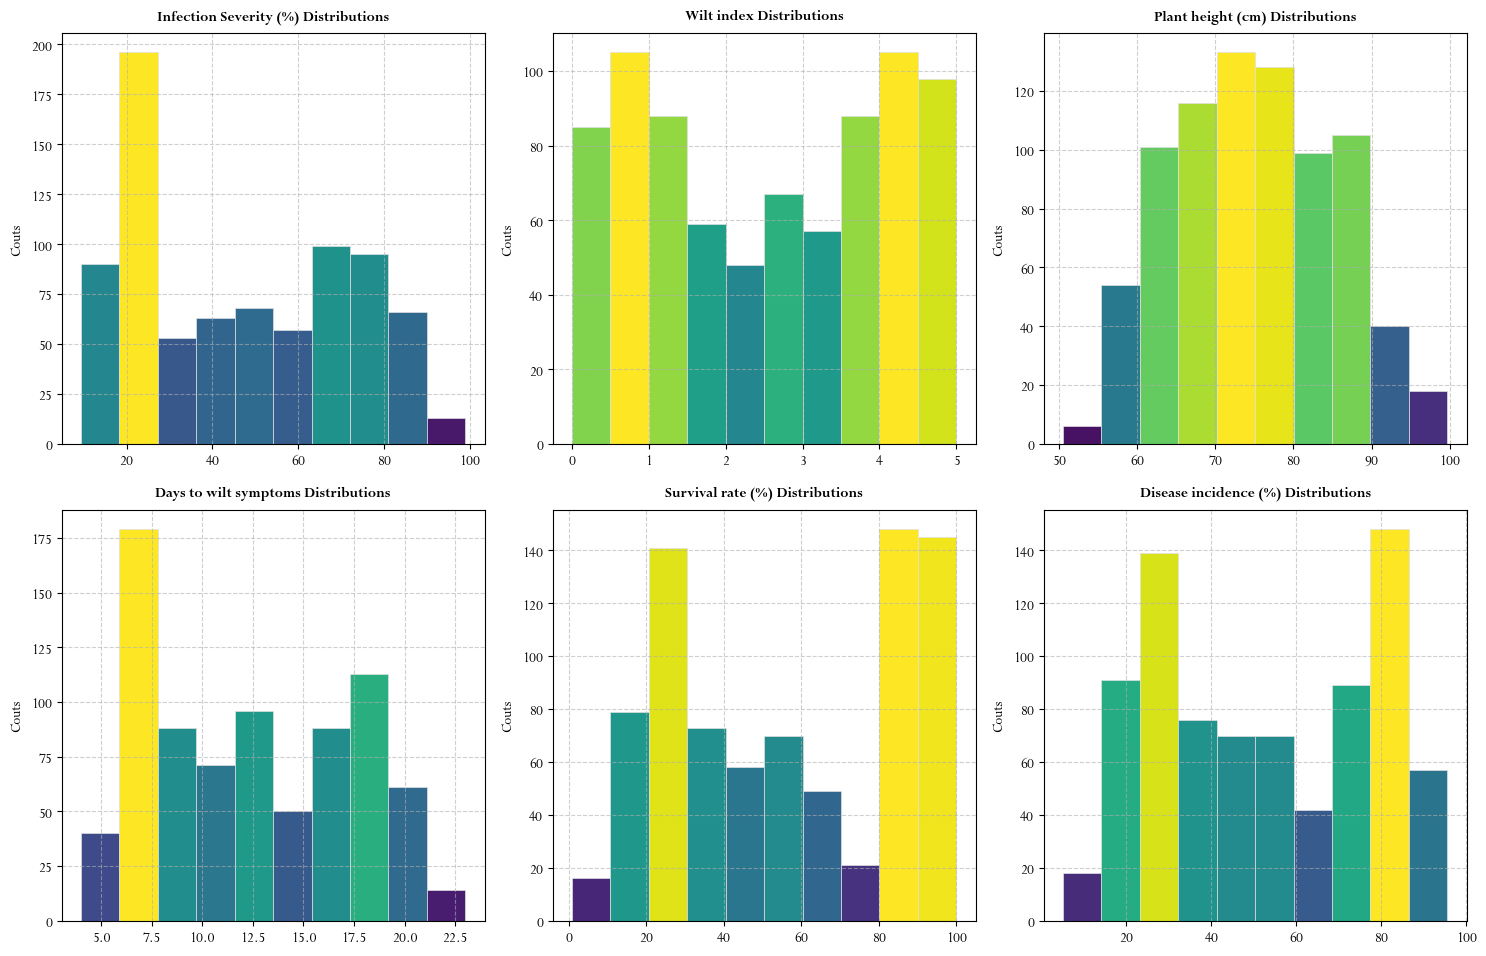

In [27]:

def plot_hitogram(data, Variables):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5* rows))
    plt.rcParams.update({'font.family': 'Perpetua', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        n, bins, patches = axes[idx].hist(data[column], edgecolor='#e0e0e0', linewidth=0.5, alpha=1)
        for i in range(len(patches)): patches[i].set_facecolor(plt.cm.viridis(n[i] / max(n)))
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10, fontweight='bold')
        axes[idx].grid(linestyle='--', alpha=0.6)
        axes[idx].set_ylabel('Couts')
    
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()[1:]
plot_hitogram(df, Variables)

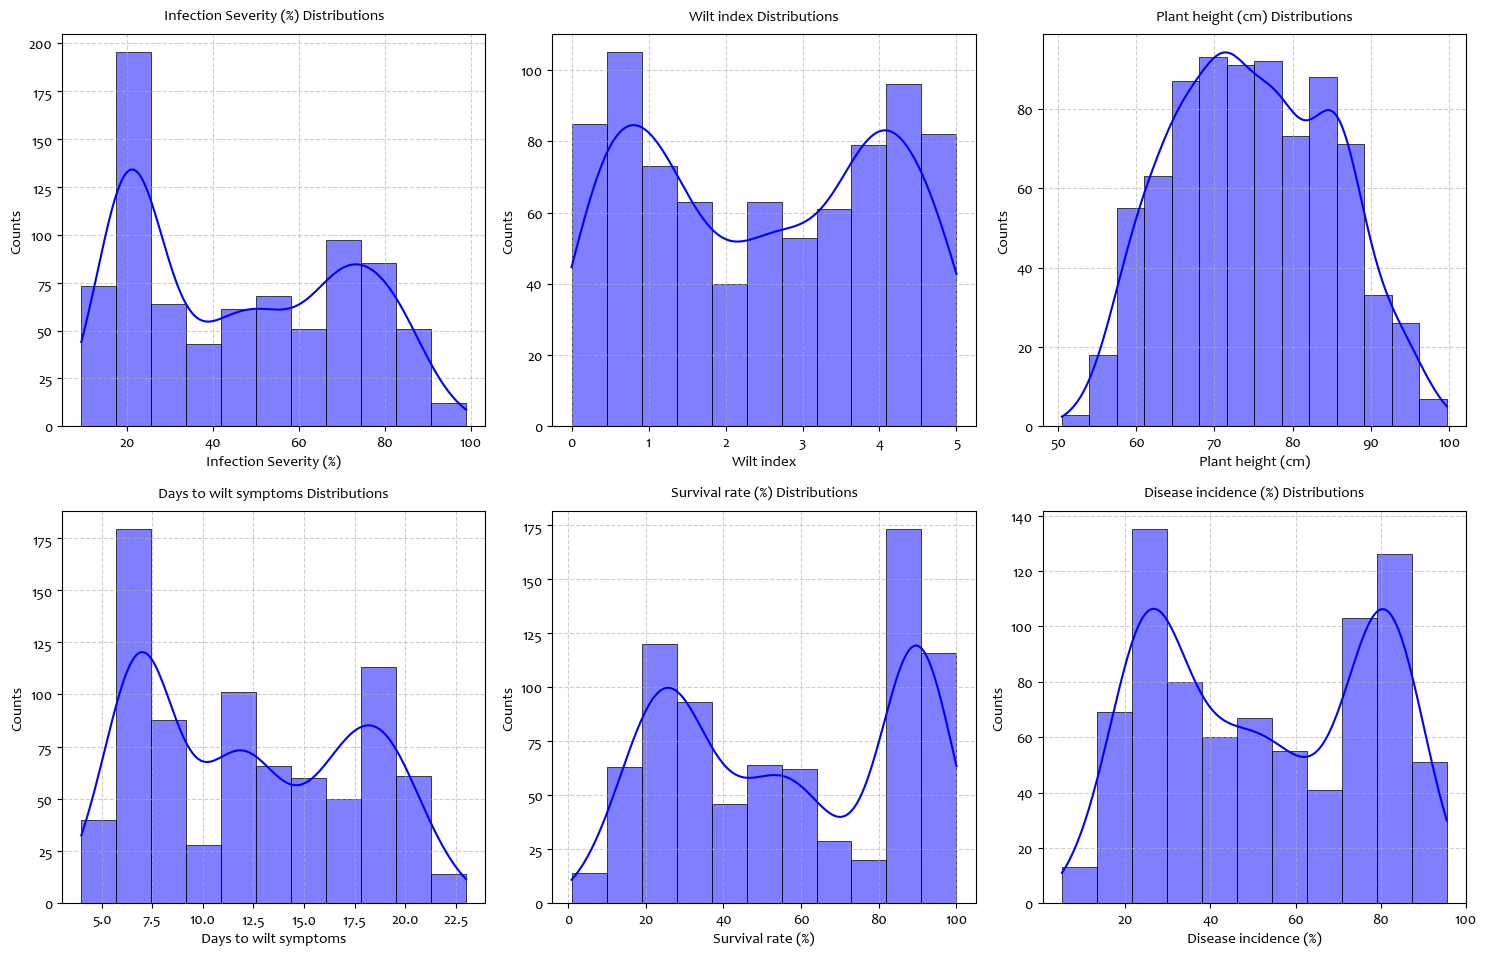

In [30]:
def hitoplot(df, Variables, group_col=None):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5* rows))
    plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.histplot(data=df, x=df[column], fill=True, hue=group_col, kde=True,  ax=axes[idx], linewidth=0.5, color='blue')
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10)
        if group_col: axes[idx].set_title(f"{column} Distributions Across {group_col}", fontsize=11, pad=10)
        
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].set_ylabel('Counts', fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
Variables = df.select_dtypes(include=[np.number]).columns[1:]
hitoplot(df, Variables, group_col=None)

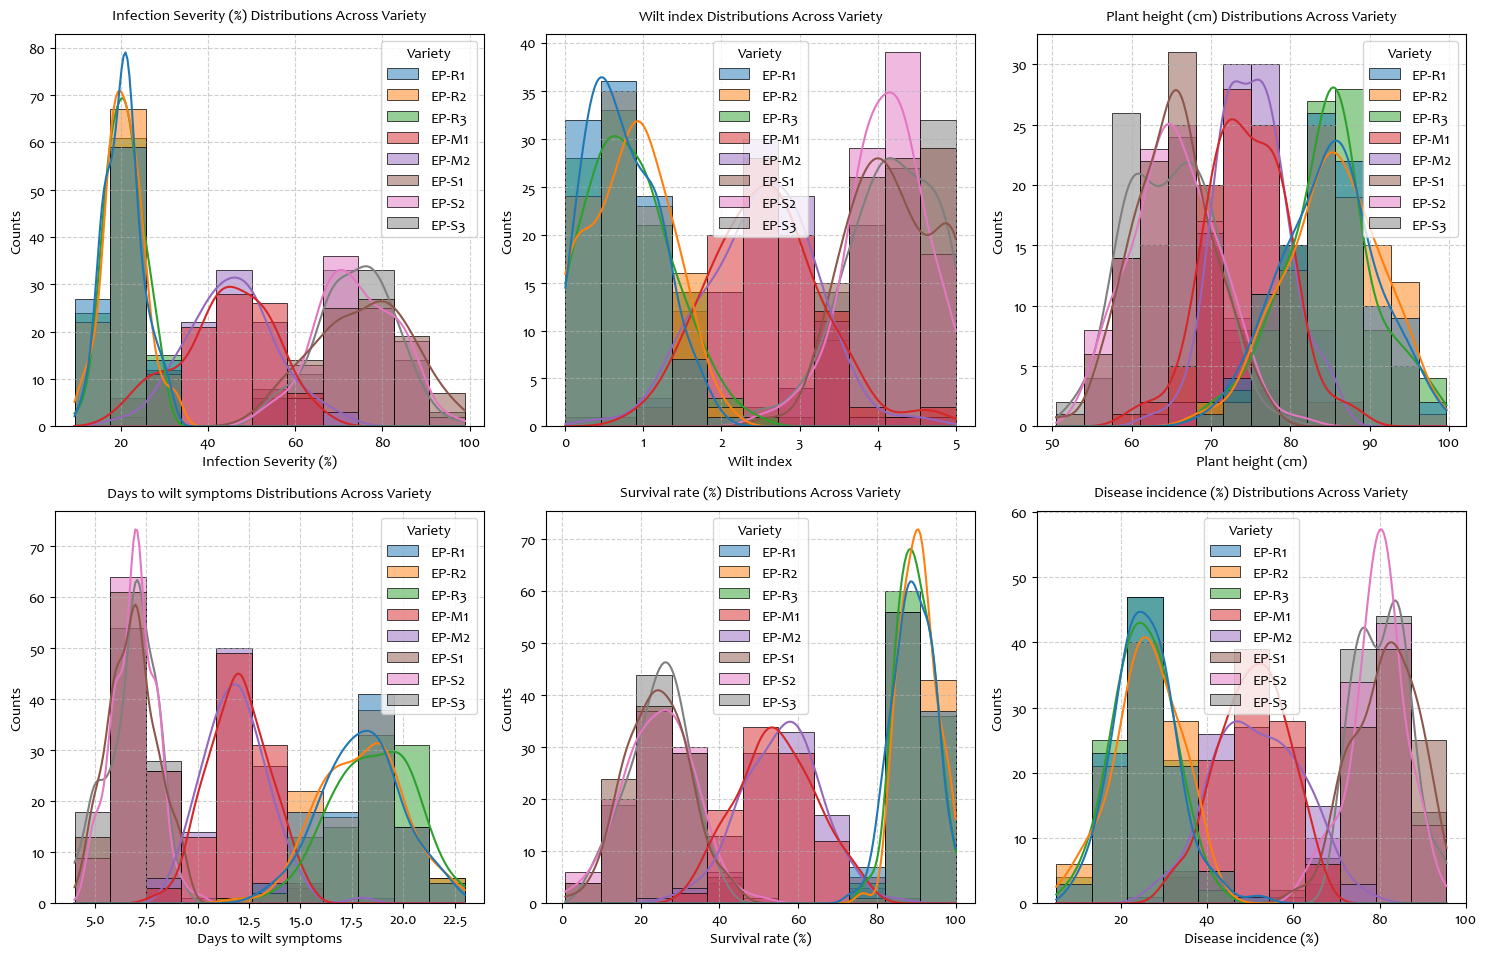

In [31]:
Variables = df.select_dtypes(include=[np.number]).columns[1:]
hitoplot(df, Variables, group_col='Variety')

<h4 style='font-family: French Script MT;  font-size: 25px; font-weight: 600'>5.2:  Kernel Density Estimation (KDE) plots</h4>

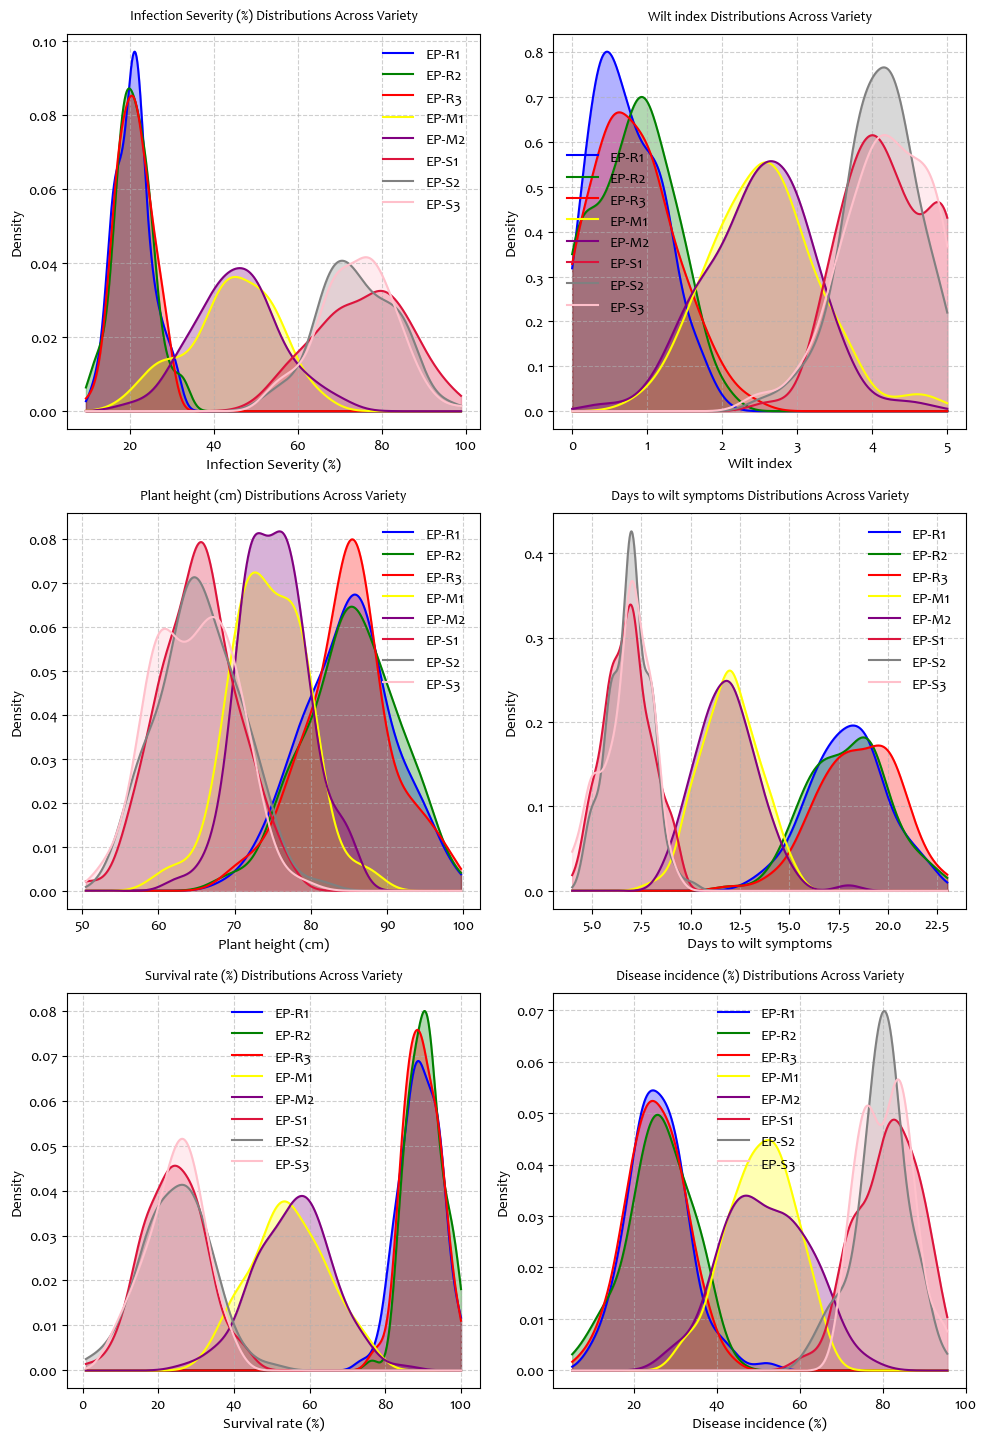

In [38]:
from scipy.stats import gaussian_kde

def plot_kdeplot(df, Variables, group_col=None):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 2)
    cols = min(num_variables, 2)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        categories = df[group_col].unique()
        colors = ['blue', 'green', 'red', 'yellow', 'purple', 'crimson', 'gray', 'pink', 'gold']
        x_range = np.linspace(df[column].min(), df[column].max(), 1000)
        for sp, color in zip(categories, colors):
            data = df[df[group_col] == sp][column]
            kde = gaussian_kde(data)
            axes[idx].plot(x_range, kde(x_range), label=sp, color=color)
            axes[idx].fill_between(x_range, kde(x_range), alpha=0.3, color=color)
        
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10)
        if group_col: axes[idx].set_title(f"{column} Distributions Across {group_col}", fontsize=10, pad=10)
        
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].set_ylabel('Density', fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
        axes[idx].legend(frameon=False)
    
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
Variables = df.select_dtypes(include=[np.number]).columns[1:]
plot_kdeplot(df, Variables, group_col='Variety')

<h4 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>5.3:  Barplot | Visual Comparisons</h4> 

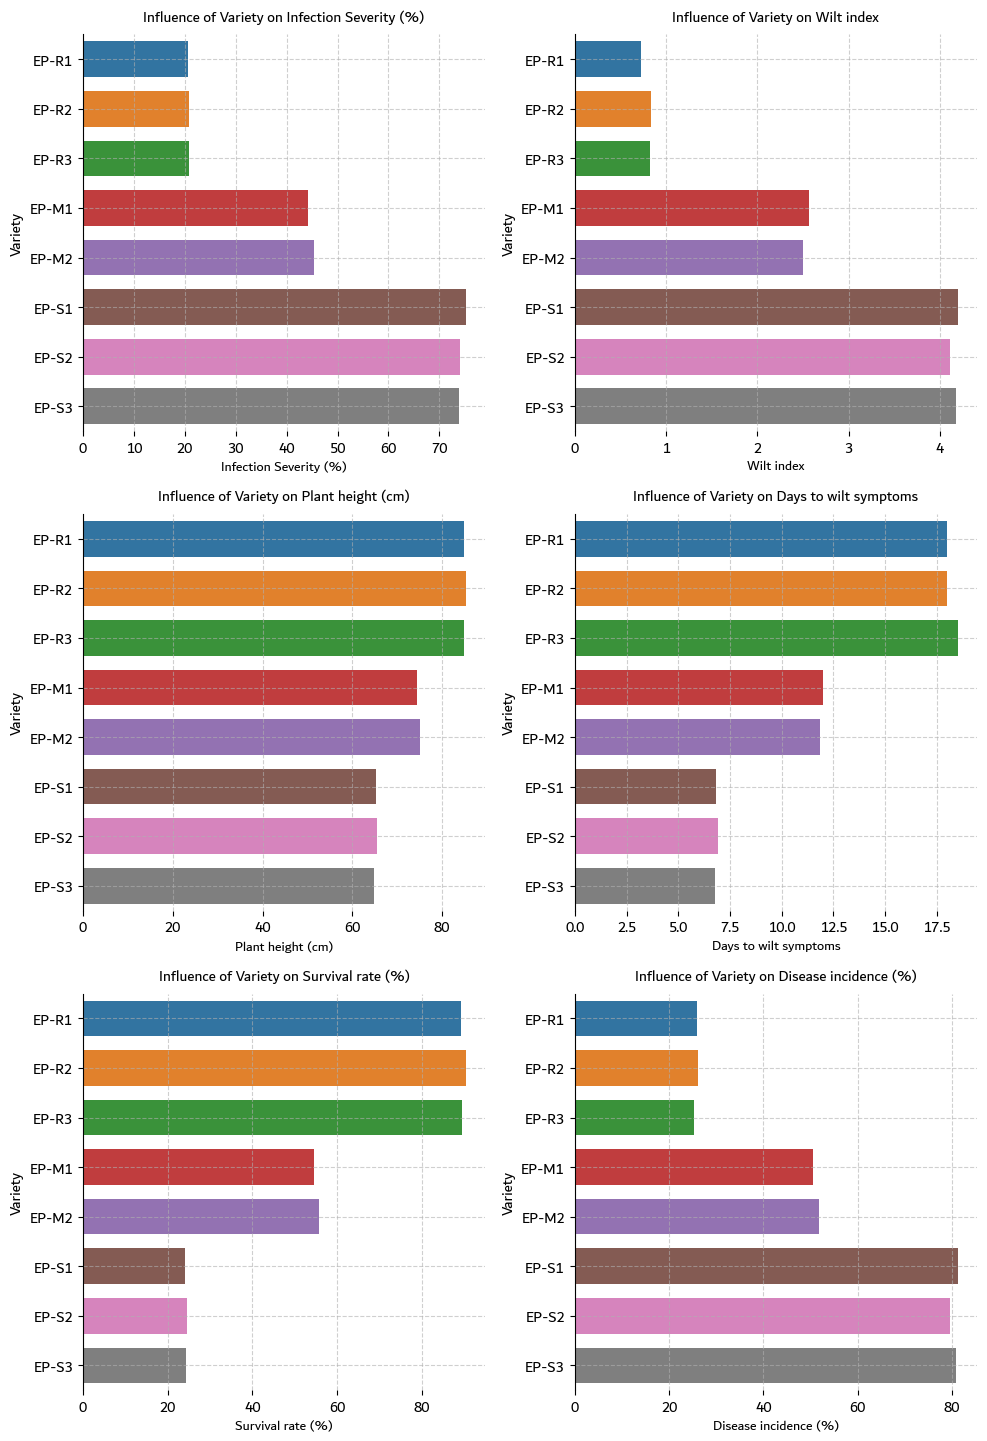

In [40]:
def plot_barplot(df, Variables, group_col):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 2)
    cols = min(num_variables, 2)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.barplot(data=df, x=df[column], y=df[group_col], 
                    fill=True, gap=0.1, ax=axes[idx], hue =group_col, linewidth=0.6, errorbar=None)   
        sns.despine(ax=axes[idx], right=True, bottom=True)
        axes[idx].set_title(f"Influence of {group_col} on {column}", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=10)
        axes[idx].grid(linestyle='--', alpha=0.6)
        
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = df.select_dtypes(include=[np.number]).columns[1:]
plot_barplot(df, Variables, group_col='Variety')

<h4 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>5.4:  Boxplot | Visual Comparisons</h4> 

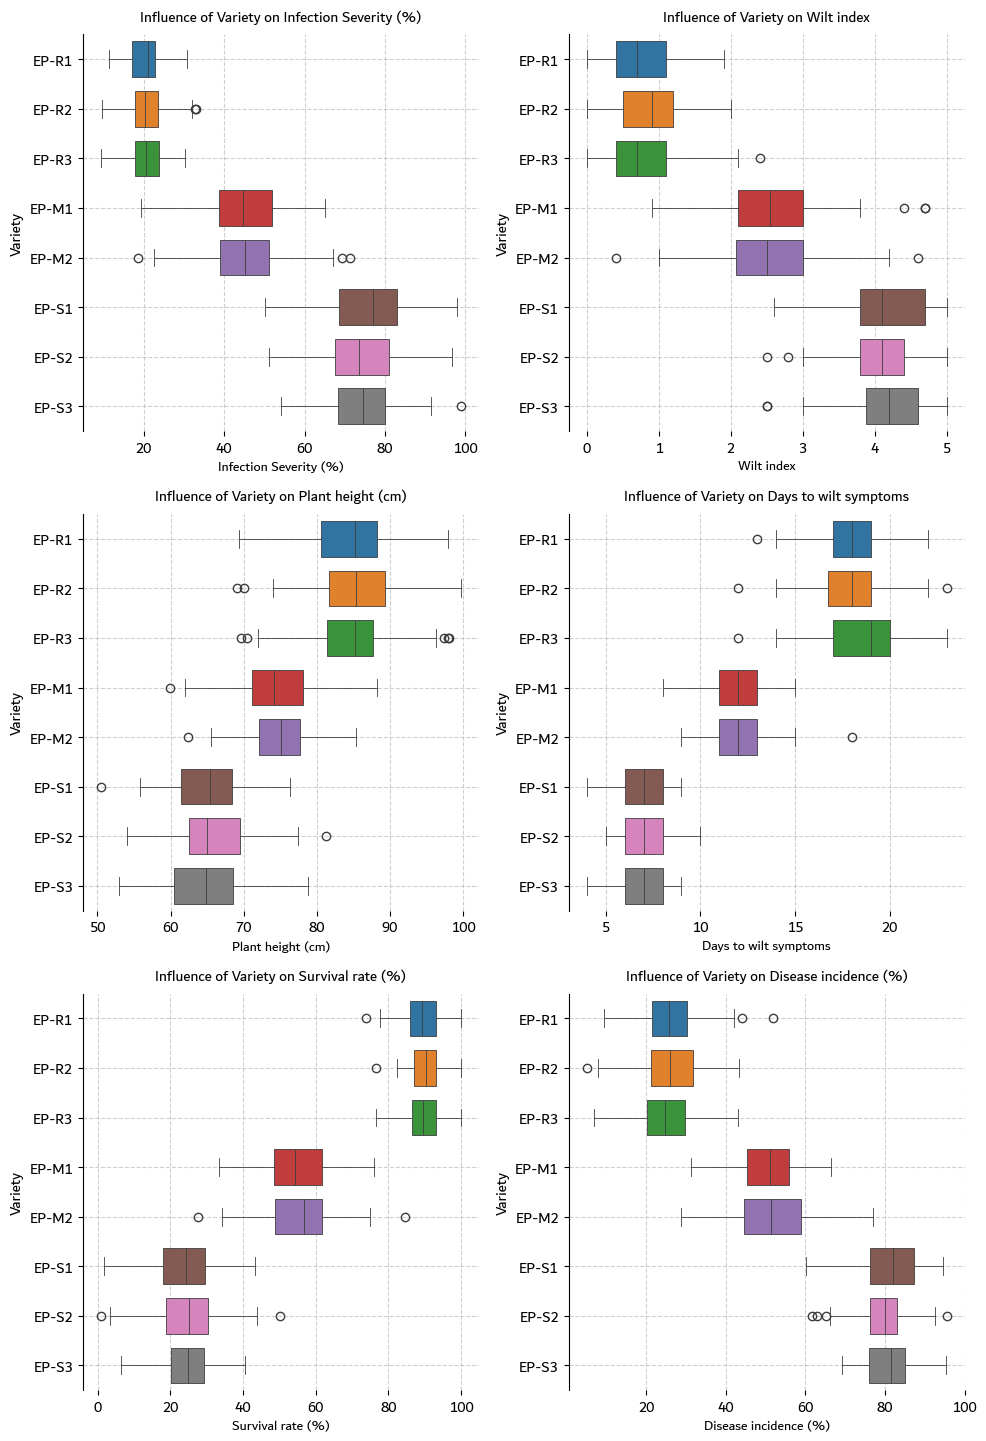

In [41]:
def plot_boxplot(df, Variables, group_col):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 2)
    cols = min(num_variables, 2)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.boxplot(data=df, x=df[column], y=df[group_col], fill=True, gap=0.1, ax=axes[idx], hue =group_col, linewidth=0.6)   
        sns.despine(ax=axes[idx], right=True, bottom=True)
        axes[idx].set_title(f"Influence of {group_col} on {column}", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=10)
        axes[idx].grid(linestyle='--', alpha=0.6)
        
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = df.select_dtypes(include=[np.number]).columns[1:]
plot_boxplot(df, Variables, group_col='Variety')

<h4 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>5.4:  Swarmplot | Visualize Datapoits</h4> 

***To explore distributions of measurements we can use ``swarmplot`` to visualize datapoits***

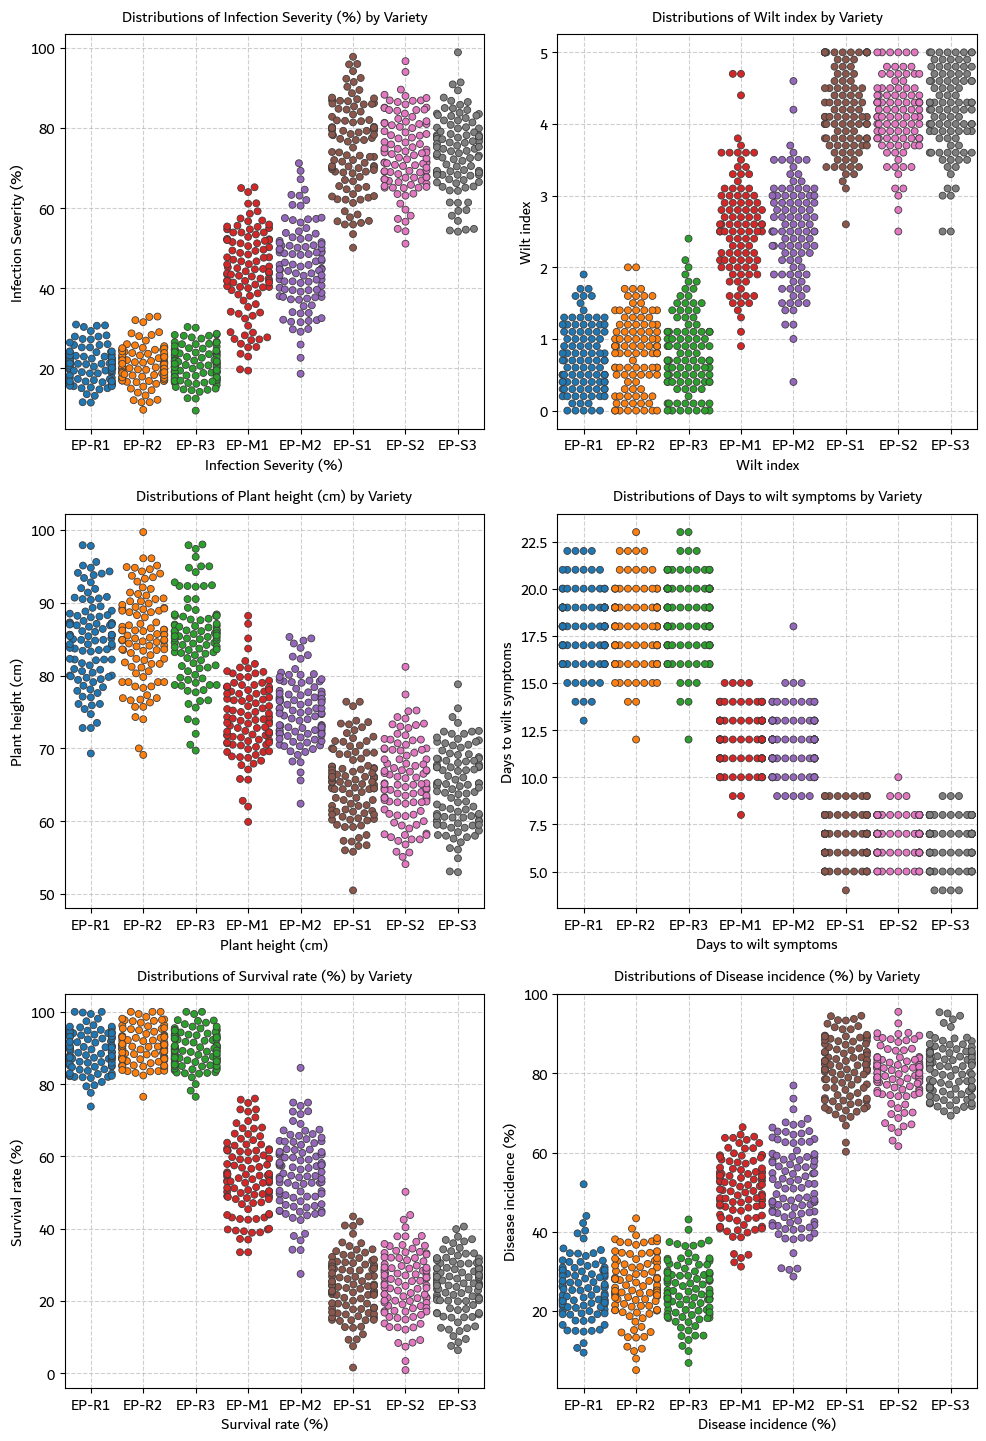

In [43]:
def swarmplot(df, Variables, group):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 2)
    cols = min(num_variables, 2)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.swarmplot(data=df, x=df[group], y=df[column], ax=axes[idx], hue=group, linewidth=0.6)   
        axes[idx].set_title(f"Distributions of {column} by {group}", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = df.select_dtypes(include=[np.number]).columns[1:]
swarmplot(df, Variables=Variables, group='Variety')

<H1 style='font-family: French Script MT; font-size: 30px; font-weight: 600'>6.0: Kruskal Wallis Test</H1>

In [45]:
def kruskall_wallis(df, group_columns: str, numerical_columns: list = None):
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
        for g in group_columns:
            if g in numerical_columns:
                numerical_columns.remove(g)
    results = []
    for group_column in group_columns:
        for column in numerical_columns:
            # Create a list of samples grouped by group_column
            groups = [group[column].dropna().values for name, group in df.groupby(group_column)]
            stats, p_value = kruskal(*groups)
            interpretation = 'Significant' if p_value < 0.05 else 'Not Significant'
            results.append({
                'Group': group_column,
                'Variables': column,
                'Kruskal-Wallis Statistic': stats,
                'P-value': p_value,
                'Significant (α<0.05)': interpretation
            })
    return pd.DataFrame(results)


# Perform Kruskal-Wallis Test on All Variables Across Group(s)
group_columns = ['Variety', 'Resistance Level']                     # List of categorical columns or factors
numerical_columns = df.select_dtypes(include=[np.number]).columns   # List of numerical variables
results = kruskall_wallis(df, group_columns, numerical_columns)     # Perform test Kruskall Wallis Test
pd.set_option('display.float_format', lambda x: '%.4f' % x)         # Display Configuration
display(results)

,Group,Variables,Kruskal-Wallis Statistic,P-value,Significant (α<0.05)
0,Variety,Replication ID,0.0000,1.0000,Not Significant
1,Variety,Infection Severity (%),682.4852,0.0000,Significant
2,Variety,Wilt index,669.3773,0.0000,Significant
3,Variety,Plant height (cm),597.9860,0.0000,Significant
4,Variety,Days to wilt symptoms,701.1451,0.0000,Significant
5,Variety,Survival rate (%),698.1517,0.0000,Significant
6,Variety,Disease incidence (%),692.2784,0.0000,Significant
7,Resistance Level,Replication ID,0.0000,1.0000,Not Significant
8,Resistance Level,Infection Severity (%),682.1712,0.0000,Significant
9,Resistance Level,Wilt index,668.7051,0.0000,Significant


---

This analysis was performed by **Jabulente**, a passionate and dedicated data analyst with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

----

<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>


<h1 style='font-size: 35px; color: red; font-family: French Script MT; font-weight: 700; text-align: center'>Data to Drive Meaningful Insights and Solutions</h1>